In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

from random import random
from numpy import array

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import utils as ut

In [91]:
df = ut.data1()

fc = ['{}'.format(e) for e in range(1,10)]
dm = df[fc]

x = dm.to_numpy()
y = df['e'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.30)

no of rows:  (124494, 12)
Index(['d', 'm', 'e', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
after date aggregation per day:  (304, 11)
after event aggregation :  (282, 11)


In [92]:
clf = SVC(kernel='poly', C=1)
scores = cross_val_score(clf, X_train, y_train, cv=10)

In [93]:
scores

array([0.8       , 0.85      , 0.75      , 0.8       , 0.7       ,
       0.8       , 0.85      , 0.84210526, 0.84210526, 0.78947368])

Text(0.5, 1.0, 'SVC')

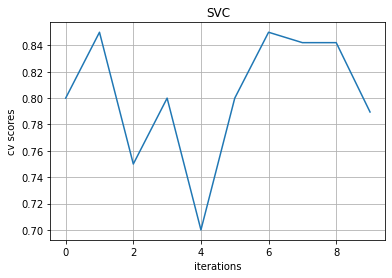

In [94]:
plt.plot(scores)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('cv scores')
plt.title('SVC')

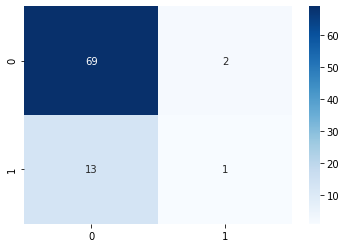

In [96]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [97]:
x = dm.to_numpy()

cols = ['1']
dm = df[cols]
y = df['e'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.30)

In [98]:
clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X_train, y_train, cv=10)

scores

array([0.8       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.75      , 0.78947368, 0.78947368, 0.78947368])

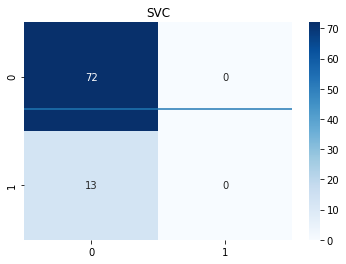

In [99]:
plt.plot(scores)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('cv scores')
plt.title('SVC')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

function to generate train, test per feature vector, just to see how SVC works for just one feature vector

In [100]:
def fv(n) :

    cols = [str(n)]
    dm = df[cols]
    x = dm.to_numpy()
    y = df['e'].to_numpy()
    
    X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.30)
    return X_train, X_test, y_train, y_test

In [101]:
lscore = {}

for e in range(1,9) :
    X_train, X_test, y_train, y_test = fv(e)

    clf = SVC(kernel='linear', C=1)
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    lscore[e] = scores

In [102]:
lscore[1]

array([0.8       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.8       , 0.84210526, 0.84210526, 0.84210526])

In [103]:
lscore[2]

array([0.8       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.75      , 0.78947368, 0.78947368, 0.78947368])

In [104]:
a = np.array(list(lscore.values()))
a.shape

(8, 10)

In [105]:
a[:,8]

array([0.84210526, 0.78947368, 0.84210526, 0.84210526, 0.84210526,
       0.84210526, 0.78947368, 0.84210526])

a very small flucutation when cross-validated samples are used per feature vector

the integers in the legend are SVC for the feature and the same classification {0,1}

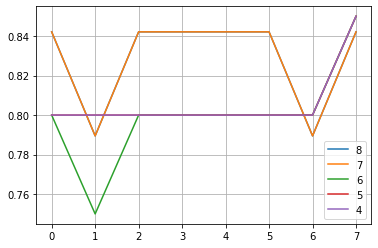

In [106]:
ll = []

n = 8
plt.plot(a[:,n])
plt.legend(str(n))
ll.append(str(n))

n = 7
plt.plot(a[:,n])
l = plt.legend(str(n))
ll.append(str(n))

n = 6
plt.plot(a[:,n])
l = plt.legend(str(n))
ll.append(str(n))

n = 5
plt.plot(a[:,n])
plt.legend(str(n))
ll.append(str(n))

n = 4
plt.plot(a[:,n])
plt.legend(str(n))
ll.append(str(n))

plt.legend(ll)
plt.grid()

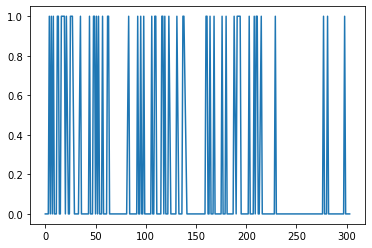

In [109]:
plt.plot(df.e)

(array([228.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  54.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

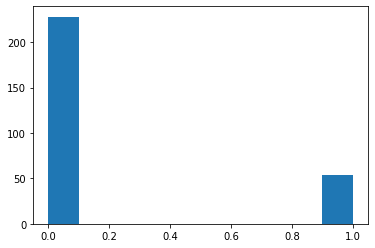

In [110]:
plt.hist(df.e)

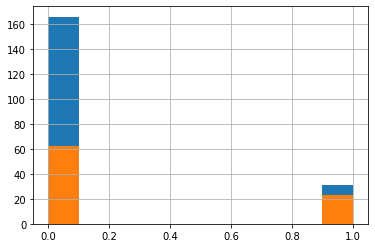

In [112]:
plt.hist(y_train)
plt.hist(y_test)
plt.grid()